In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [24]:
# Essa função irá trazer 3 valores pra mim: os dados de treino, de teste e os dados propriamente dito.
# def get_train_test(url, split_percent=0.8): # split_percent define a proporção das amostras de treino/teste
#     df = read_csv(url, usecols=[1], engine='python')    #colocar em dataframe os dados
#     data = np.array(df.values.astype("float32"))        #pegar os valores deles e colocar no tipo float
#     scaler = MinMaxScaler(feature_range=(0,1))          # normalizar esses dados
#     data = scaler.fit_transform(data).flatten()         
#     n=len(data)
#     # Aqui vai ocorrer a divisão do dataset em treino e teste
#     split = int(n*split_percent)
#     train_data = data[range(split)]
#     test_data = data[split:]
#     return train_data, test_data, data

df = pd.read_excel("C:/Users/jllce/Downloads/classificacao_assuntos.xlsx")


In [26]:
df.iloc[0]

Comentário    Nunca mais compro nada na @petlovebr bicho
Assunto                                            Outro
Name: 0, dtype: object

In [3]:
# Função para preparar os input (variáveis independentes (X) e dependente (Y))
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

In [5]:
# Função para criar o modelo de deep learning RNN
# Basicamente, pelo .add, serão adicionadas 2 camadas:
# 1) uma SimpleRNN, que vai fazer o papel recursivo, recebendo quantas camadas de RNN ele vai ter, o
#  tamanho do shape dos dados que to passando e o tipo de ativação.
# 2) uma camada densa (de saída), que vai depender tambem do quanto especifique de dense_units e do tipo de ativação
# No compilador, eu vou usar o erro quadrado médio como função de custo e o otimizador padrão Adam
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape = input_shape, activation = activation[0]))
    model.add(Dense(units = dense_units, activation = activation[1])) #ou seja, dentro da lista acvation, o 1°
    model.compile(loss="mean_squared_error", optimizer = "adam")      #vai pra Simple e o 2° vai pra dense
    return model

In [6]:
# Função auxiliar que vai printar o erro, por meio do erro quadrado médio.
def print_error(trainY, testY, train_predict, test_predict):
    # Erro das predições
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print do RMSE
    print("Train RMSE: %.3f RMSE" % (train_rmse))
    print("Test RMSE: %.3f RMSE" % (test_rmse))

# Função auxiliar pra plotar os resultados
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color="r")
    plt.legend(['Actual', "Predictions"])
    plt.xlabel("Observation number after given time steps")
    plt.ylabel("Sunspots scaled")
    plt.title("Actual and Predicted Values. The Red Line Separates The Training and Test Examples")

In [8]:
# Aqui começa o trabalho. Trazer a base de dados
sunspots_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"

In [9]:
time_steps = 12

In [10]:
#aqui abaixo é o retorno da função criada lá em cima, em que informo apenas a URL e ele devole essas 3 info
train_data, test_data, data = get_train_test(sunspots_url) 

In [12]:
#pegando os dados de treino e teste de X e Y 
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [18]:
#Criando o modelo e treinando ele
# Serão 3 camadas ocultas
# a camada densa (de saída) será 1 só
# shape (12,1)
# função de ativação (activation 0 e 1) são do tipo tangente hiperbólica
# serão 20 épocas: é a etapa de treinamento e validação dos dados do meu modelo de rede neural. E
# cada época ele vai treinando novamente. Como é uma rede recorrente, o output não é só a saída simplesmente, mas
# também pode ser o dado de entrada de novo, pra ele reaprender o processo.

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), activation=["tanh","tanh"])
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)



Epoch 1/50
187/187 - 2s - loss: 0.0381 - 2s/epoch - 10ms/step
Epoch 2/50
187/187 - 1s - loss: 0.0292 - 505ms/epoch - 3ms/step
Epoch 3/50
187/187 - 1s - loss: 0.0237 - 538ms/epoch - 3ms/step
Epoch 4/50
187/187 - 1s - loss: 0.0201 - 635ms/epoch - 3ms/step
Epoch 5/50
187/187 - 1s - loss: 0.0170 - 692ms/epoch - 4ms/step
Epoch 6/50
187/187 - 0s - loss: 0.0146 - 479ms/epoch - 3ms/step
Epoch 7/50
187/187 - 0s - loss: 0.0127 - 465ms/epoch - 2ms/step
Epoch 8/50
187/187 - 0s - loss: 0.0112 - 455ms/epoch - 2ms/step
Epoch 9/50
187/187 - 1s - loss: 0.0099 - 546ms/epoch - 3ms/step
Epoch 10/50
187/187 - 0s - loss: 0.0088 - 479ms/epoch - 3ms/step
Epoch 11/50
187/187 - 0s - loss: 0.0080 - 463ms/epoch - 2ms/step
Epoch 12/50
187/187 - 0s - loss: 0.0073 - 465ms/epoch - 2ms/step
Epoch 13/50
187/187 - 0s - loss: 0.0069 - 458ms/epoch - 2ms/step
Epoch 14/50
187/187 - 0s - loss: 0.0065 - 454ms/epoch - 2ms/step
Epoch 15/50
187/187 - 0s - loss: 0.0061 - 455ms/epoch - 2ms/step
Epoch 16/50
187/187 - 0s - loss: 0.0

In [19]:
# depois do modelo treinado, a gente vai predizer tanto nos dados treinos, como nos de teste.
# Porque no de teste também? Como há a recorrência, ele faz previsões durante o período de treino também.
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

2/2 [==============================] - 0s 5ms/step


In [20]:
print_error(trainY, testY, train_predict, test_predict)
# É possível perceber que quando as épocas foram aumentadas de 20 para 50, o modelo desde a 38 até a 50 não
# proporcionou muita mudança. E isso pode significar um custo maior pro mesmo resultado, bem como um overfitting
# do modelo.

Train RMSE: 0.058 RMSE
Test RMSE: 0.085 RMSE


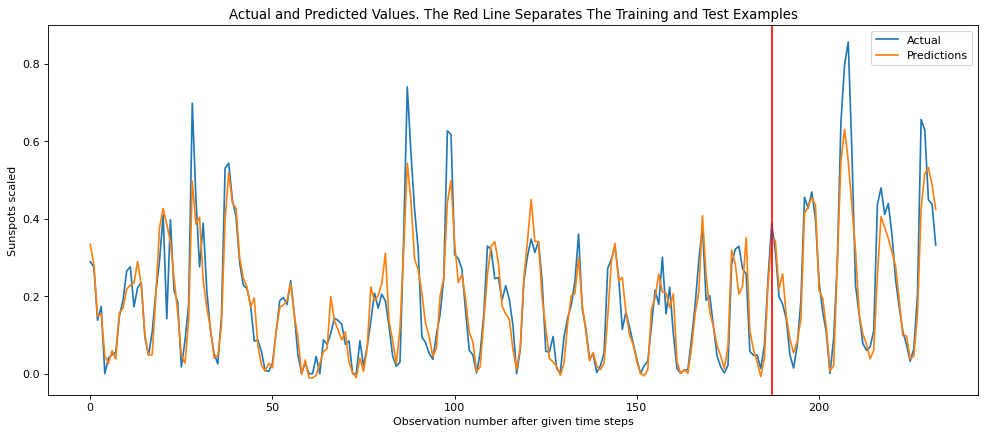

In [21]:
# É possível ver que a curva de predições se ajustou muito bem com a atual. Basicamente, foi
# recriada essa série temporal
plot_result(trainY, testY, train_predict, test_predict)